Question :
- K = 5 
- Garder 
- Critère GridSearchCv
- Gini index or cross entropy for tree

<h1> Projet de Machine Learning - Etienne Gaucher, Paul Mazet</h1> 

<h2>  I - Import et analyse du dataset  </h2> 

In [1]:
# import des librairies numpy et pandas
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# import du dataset depuis le fichier .csv
data = pd.read_csv('falldataproject.csv')
print("Taille du dataset original :", data.shape, "\n")
print(data.head(), "\n")

# classe de chaque variable
print(data.dtypes, "\n")

# suppression de la colonne obs
data = data.drop("obs", axis=1)

# suppression des lignes dupliquées
data = data.drop_duplicates()

# suppression des colonnes dupliquées
data = (data.T.drop_duplicates()).T

# vérification de présence de valeur NA dans le dataset
print("Présence de NA dans le dataset ? ->", bool(data.isnull().sum().sum()), "\n")

# assignation des datasets X et Y
X = data.drop("FALL", axis=1)
Y = data["FALL"]
print("Taille de X :", X.shape, "\n")
print("Taille de Y :", Y.shape, "\n")

# proportion de classe 1 dans le dataset
print("Proportion de classe 1 :", Y.mean(), "\n") 

# vérifie si le dataset est "scale" (centré-réduit)
stat = {'Mean':X.mean(), 'Variance':X.std()}
pd.DataFrame(data=stat)

Taille du dataset original : (2821, 89) 

   obs  raw_feat_X1  raw_feat_X2  raw_feat_X3  raw_feat_X4  raw_feat_X5  \
0    0     0.249744    -0.162770     0.223727     0.393904    -0.154366   
1    1     0.385843    -0.660978    -0.127798    -0.205710    -0.160936   
2    2     3.344528    -4.535931     0.165140    -0.228745     3.203818   
3    3     3.190676    -2.884463    -1.153080    -0.698292     1.868221   
4    4     2.338575    -2.699941    -0.069211    -0.025849     1.420714   

   raw_feat_X6  raw_feat_X7  raw_feat_X8  raw_feat_X9  ...  deriv_feat_X21  \
0     0.128968     1.090661     0.913849     0.505526  ...        0.121241   
1     0.111606     0.171391     2.889781     0.377333  ...       -0.182778   
2     3.379462     1.089901     2.097552     0.877990  ...        0.425260   
3     2.493077     2.546198     3.817391     3.711000  ...       -4.743065   
4     2.137326     1.097388     2.101987     1.200319  ...       -2.766941   

   deriv_feat_X22  deriv_feat_X23  der

,Mean,Variance
raw_feat_X1,1.667207e-09,1.0
raw_feat_X2,3.795499e-10,1.0
raw_feat_X3,3.899275e-09,1.0
raw_feat_X4,1.012218e-09,1.0
raw_feat_X5,-1.859470e-10,1.0
...,...,...
deriv_feat_X25,9.615344e-10,1.0
deriv_feat_X26,6.541423e-10,1.0
deriv_feat_X27,4.666482e-09,1.0
deriv_feat_X28,2.200017e-08,1.0


<h2> II - Validation croisée et score </h2>

In [2]:
# import des librairies
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

def performance_metrics(model, K=5):
    '''
    Inputs
    ---------------------
    model : classifier function [sklearn'function]
    K : number of folds for cross-validation [int] (by default=5)
    
    Outputs
    ---------------------
    mean metrics (accuracy, f1-score, recall and precision) of the model over the folds [DataFrame]
    '''
    
    # définition des listes
    accuracy_score_test = []
    f1_score_test = []
    recall_score_test = []
    precision_score_test = []
    #auc_score_test = []
    
    # K-fold stratifié
    skf = StratifiedKFold(n_splits = K, shuffle = True)
    
    for train_index, test_index in skf.split(X, Y):
        
        # construction des dataset train et test
        X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
        Y_train, Y_test = Y.loc[train_index], Y.loc[test_index]
        
        # apprentissage sur le dataset train et prédiction sur le dataset test
        model_fit = model.fit(X_train, Y_train)
        #Y_proba = model_fit.predict_proba(X_test)[:,1]    
        Y_pred = model_fit.predict(X_test)
        
        # score du modèle pour chaque fold
        # auc_score_test.append(metrics.roc_auc_score(Y_test, Y_proba))
        accuracy_score_test.append(metrics.accuracy_score(Y_test, Y_pred))
        f1_score_test.append(metrics.f1_score(Y_test, Y_pred))
        recall_score_test.append(metrics.recall_score(Y_test, Y_pred))
        precision_score_test.append(metrics.precision_score(Y_test, Y_pred))
    
    labels = [#'auc_test', 
           'accuracy_test',
           'f1_test', 
           'recall_test', 
           'precision_test']
    
    data = np.array([#auc_score_test, 
        accuracy_score_test,
        f1_score_test, 
        recall_score_test,
        precision_score_test])
    
    # moyenne de chaque score
    data_mean = np.mean(data, axis=1)
    
    df = pd.DataFrame(data_mean).T
    df.columns = labels
    
    return df

<h2> III - Les modèles </h2>

<h3> A - Naive Bayes Classifier </h3>

In [3]:
from sklearn.naive_bayes import GaussianNB

nbc = performance_metrics(GaussianNB())
nbc

,accuracy_test,f1_test,recall_test,precision_test
0,0.961006,0.775621,0.935854,0.66528


<h3> B - Logistic regression </h3>

In [4]:
from sklearn.linear_model import LogisticRegression

lr = performance_metrics(LogisticRegression())
lr

# Courbe ROC 

,accuracy_test,f1_test,recall_test,precision_test
0,0.989365,0.923429,0.90561,0.944191


<h3> C - Discriminant analysis </h3>


<h4> Linear discriminant analysis (LDA) </h4>

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = performance_metrics(LinearDiscriminantAnalysis())
lda

,accuracy_test,f1_test,recall_test,precision_test
0,0.987948,0.909376,0.851463,0.977938


<h4> Quadratic discriminant analysis (QDA) </h4>

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = performance_metrics(QuadraticDiscriminantAnalysis())
qda

# Courbe ROC 

,accuracy_test,f1_test,recall_test,precision_test
0,0.975891,0.852566,0.955488,0.774056


<h3> D - Support Vector Machine (SVM)

<h4> Linear kernel </h4>

In [7]:
from sklearn.svm import SVC

svm_l = performance_metrics(SVC(kernel = 'linear'))
svm_l

# Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
# Courbe ROC 

,accuracy_test,f1_test,recall_test,precision_test
0,0.989011,0.920733,0.89561,0.948328


<h4> Polynomial kernel </h4>

In [8]:
svm_p = performance_metrics(SVC(kernel = 'poly'))
svm_p

,accuracy_test,f1_test,recall_test,precision_test
0,0.986884,0.900811,0.846585,0.965348


<h4> Radial kernel </h4>

In [9]:
svm_r = performance_metrics(SVC(kernel = 'rbf'))
svm_r

,accuracy_test,f1_test,recall_test,precision_test
0,0.988656,0.915784,0.866341,0.972722


<h3> E - K-nearest neighbors (KNN) </h3>

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# créer un dictionnaire de valeurs pour le paramètre n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

# utilisation de GridSearchCV pour tester toutes les combinaisons du dictionnaire
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# apprentissage du modèle
knn_gscv.fit(X, Y)

print("Number of neighbors :", knn_gscv.best_params_['n_neighbors'])

knn = performance_metrics(knn_gscv.best_estimator_)

knn

Number of neighbors : 7


,accuracy_test,f1_test,recall_test,precision_test
0,0.988656,0.915551,0.861707,0.978354


<h3> F - Decision tree </h3>

<h4> Basic decision tree </h4>

In [11]:
from sklearn import tree

bdt = performance_metrics(tree.DecisionTreeClassifier())
bdt

,accuracy_test,f1_test,recall_test,precision_test
0,0.983339,0.882782,0.881098,0.88932


<h4> Bagging </h4>

In [12]:
from sklearn.ensemble import BaggingClassifier

bag = performance_metrics(BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=25))
bag

,accuracy_test,f1_test,recall_test,precision_test
0,0.9883,0.912443,0.86622,0.965359


<h3> G - Random Forest </h3>

<h4> Random forest without bagging </h4>

In [13]:
from sklearn.ensemble import RandomForestClassifier

# créer un dictionnaire de valeurs pour les paramètres n_estimators (nombre d'arbres) et max_depth
param_grid = {'n_estimators': np.arange(1, 100, 10), 'max_depth': np.arange(1,15,2)}

# utilisation de GridSearchCV pour tester toutes les combinaisons du dictionnaire
rf_gscv = GridSearchCV(RandomForestClassifier(bootstrap=False), param_grid, cv=5)

# apprentissage du modèle
rf_gscv.fit(X, Y)

print("Number of estimators :", rf_gscv.best_params_['n_estimators'])
print("Maximal depth :", rf_gscv.best_params_['max_depth'])

rf = performance_metrics(RandomForestClassifier(n_estimators=rf_gscv.best_params_['n_estimators'], 
                                           max_depth=rf_gscv.best_params_['max_depth'],
                                           bootstrap=False)) # max_features=sqrt(n_features)
rf

Number of estimators : 51
Maximal depth : 9


,accuracy_test,f1_test,recall_test,precision_test
0,0.98972,0.924402,0.886098,0.969292


<h4> Random forest with bagging </h4>

In [14]:
from sklearn.ensemble import RandomForestClassifier

# créer un dictionnaire de valeurs pour les paramètres n_estimators (nombre d'arbres) et max_depth
param_grid = {'n_estimators': np.arange(1, 100, 10), 'max_depth': np.arange(1,15,2)}

# utilisation de GridSearchCV pour tester toutes les combinaisons du dictionnaire
rfb_gscv = GridSearchCV(RandomForestClassifier(bootstrap=True), param_grid, cv=5)

# apprentissage du modèle
rfb_gscv.fit(X, Y)

print("Number of estimators :", rfb_gscv.best_params_['n_estimators'])
print("Maximal depth :", rfb_gscv.best_params_['max_depth'])

rfb = performance_metrics(rfb_gscv.best_estimator_)
rfb

Number of estimators : 21
Maximal depth : 13


,accuracy_test,f1_test,recall_test,precision_test
0,0.990786,0.931632,0.891341,0.978733


<h3> H - Boosting (AdaBoost) </h3>

In [15]:
from sklearn.ensemble import AdaBoostClassifier

boost = performance_metrics(AdaBoostClassifier(n_estimators=200))
boost

,accuracy_test,f1_test,recall_test,precision_test
0,0.987947,0.912739,0.88122,0.946785


<h3> I - Gradient Tree Boosting </h3>

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gtb = performance_metrics(GradientBoostingClassifier(n_estimators=100, validation_fraction=0.2, n_iter_no_change=10))
gtb

,accuracy_test,f1_test,recall_test,precision_test
0,0.986886,0.906142,0.881463,0.93319


<h3> J - Stacking </h3>

In [17]:
from sklearn.ensemble import StackingClassifier

classifier = [('naive',GaussianNB()),
              
              ('logistic',LogisticRegression()),
              
              ('lda',LinearDiscriminantAnalysis()), 
              ('qda',QuadraticDiscriminantAnalysis()), 
              
              ('svm_l',SVC(kernel = 'linear')),
              ('svm_r',SVC(kernel = 'rbf')),
              ('svm_p',SVC(kernel = 'poly')),
              
              ('dt',tree.DecisionTreeClassifier()),
              
              ('knn',knn_gscv.best_estimator_),
              
              ('rf',rfb_gscv.best_estimator_),
              ('adaboost',AdaBoostClassifier(n_estimators=200)),
              ('gradtree',GradientBoostingClassifier(n_estimators=100, 
                                                      validation_fraction=0.2, 
                                                      n_iter_no_change=10))
             ]

stack = performance_metrics(StackingClassifier(estimators=classifier, final_estimator=LogisticRegression()))
stack

,accuracy_test,f1_test,recall_test,precision_test
0,0.992203,0.944022,0.916098,0.97484


<h2> IV - Comparaison des modèles </h2>

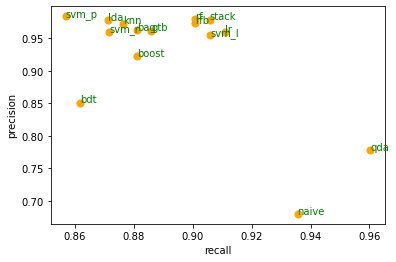

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(nbc.recall_test, nbc.precision_test, s = 50, c = 'orange', marker = 'o')
plt.annotate("naive", (nbc.recall_test, nbc.precision_test), c = 'green')

plt.scatter(lr.recall_test, lr.precision_test, s = 50, c = 'orange', marker = 'o')
plt.annotate("lr", (lr.recall_test, lr.precision_test), c = 'green')

plt.scatter(lda.recall_test, lda.precision_test, s = 50, c = 'orange', marker = 'o')
plt.annotate("lda", (lda.recall_test, lda.precision_test), c = 'green')

plt.scatter(qda.recall_test, qda.precision_test, s = 50, c = 'orange', marker = 'o')
plt.annotate("qda", (qda.recall_test, qda.precision_test), c = 'green')

plt.scatter(svm_l.recall_test, svm_l.precision_test, s = 50, c = 'orange', marker = 'o')
plt.annotate("svm_l", (svm_l.recall_test, svm_l.precision_test), c = 'green')

plt.scatter(svm_p.recall_test, svm_p.precision_test, s = 50, c = 'orange', marker = 'o')
plt.annotate("svm_p", (svm_p.recall_test, svm_p.precision_test), c = 'green')

plt.scatter(svm_r.recall_test, svm_r.precision_test, s = 50, c = 'orange', marker = 'o')
plt.annotate("svm_r", (svm_r.recall_test, svm_r.precision_test), c = 'green')

plt.scatter(knn.recall_test, knn.precision_test, s = 50, c = 'orange', marker = 'o')
plt.annotate("knn", (knn.recall_test, knn.precision_test), c = 'green')

plt.scatter(bdt.recall_test, bdt.precision_test, s = 50, c = 'orange', marker = 'o')
plt.annotate("bdt", (bdt.recall_test, bdt.precision_test), c = 'green')

plt.scatter(bag.recall_test, bag.precision_test, s = 50, c = 'orange', marker = 'o')
plt.annotate("bag", (bag.recall_test, bag.precision_test), c = 'green')

plt.scatter(rf.recall_test, rf.precision_test, s = 50, c = 'orange', marker = 'o')
plt.annotate("rf", (rf.recall_test, rf.precision_test), c = 'green')

plt.scatter(rfb.recall_test, rfb.precision_test, s = 50, c = 'orange', marker = 'o')
plt.annotate("rfb", (rfb.recall_test, rfb.precision_test), c = 'green')

plt.scatter(boost.recall_test, boost.precision_test, s = 50, c = 'orange', marker = 'o')
plt.annotate("boost", (boost.recall_test, boost.precision_test), c = 'green')

plt.scatter(gtb.recall_test, gtb.precision_test, s = 50, c = 'orange', marker = 'o')
plt.annotate("gtb", (gtb.recall_test, gtb.precision_test), c = 'green')

plt.scatter(stack.recall_test, stack.precision_test, s = 50, c = 'orange', marker = 'o')
plt.annotate("stack", (stack.recall_test, stack.precision_test), c = 'green')

plt.xlabel("recall")
plt.ylabel("precision")
plt.show()
fig.savefig("plot.png", dpi = 500)